In [1]:

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

import torch.nn.functional as F
from torchsummary import summary

import imageVisualizationHelper 
from layerNormalizationNeuralNetwork import LayerNormalizationNeuralNetwork
import commonHelper
import trainLoopHelper
import testLoopHelper
import datasetProvider



In [2]:
DATA_FOLDER = "../../data"
from torch.utils.data import Dataset
image_classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

---->TRAINING data with transform


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

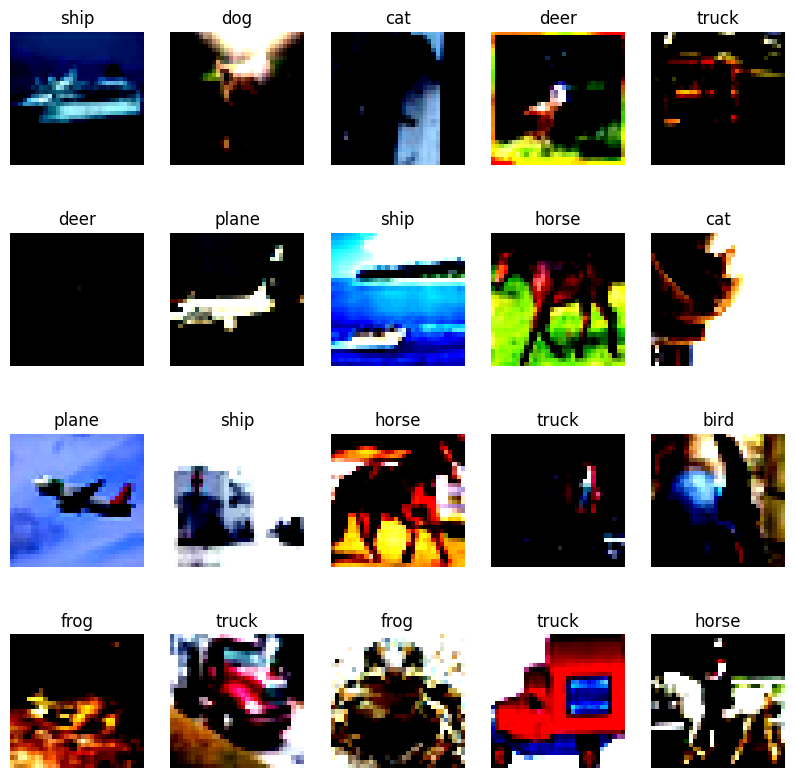

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


---->TEST data with transform


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


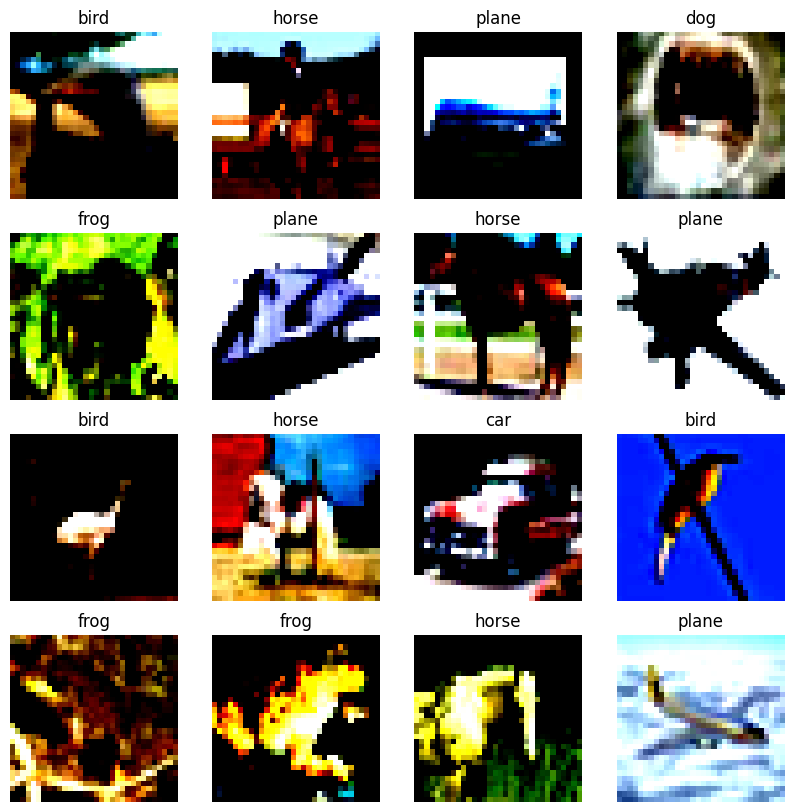

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


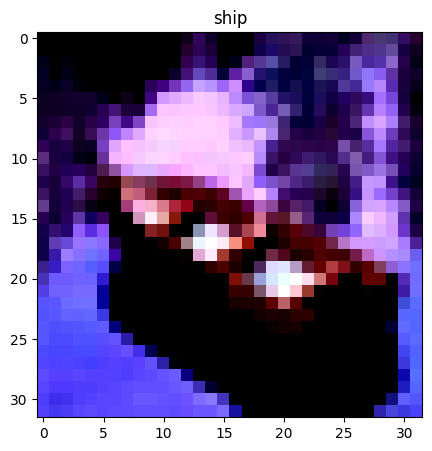

In [3]:

# Download training data from open datasets.

train_transforms = datasetProvider.compose_custom_transforms(datasetProvider.create_basic_transforms_collection())
test_transforms = datasetProvider.compose_custom_transforms(datasetProvider.create_basic_transforms_collection())

train_dataset, test_dataset = datasetProvider.get_CIFAR10_datasets(train_transforms_collection=train_transforms,
                                                                   test_transforms_collection=test_transforms,
                                                                    data_folder=DATA_FOLDER)

print("---->TRAINING data with transform")
imageVisualizationHelper.randomly_show_images_from_tensor_array(train_dataset, image_classes, rows=4, cols=5)


print("---->TEST data with transform")
imageVisualizationHelper.randomly_show_images_from_tensor_array(train_dataset, image_classes, rows=4, cols=4)

# Show single image
sample_idx = torch.randint(0, len(test_dataset), size=(1,))  
image_data, label = test_dataset[sample_idx.item()]
imageVisualizationHelper.show_image(image_data, image_classes[label])


In [4]:

device = commonHelper.get_device(use_seed=True)
BATCH_SIZE = 128
train_dataloader, test_dataloader = datasetProvider.get_dataloaders(train_dataset=train_dataset,
                                                                    test_dataset=test_dataset,
                                                                    batch_size=BATCH_SIZE)
                                                                    


Shape of test_dataloader batch_data [Batch, C, H, W]: torch.Size([128, 3, 32, 32])
Shape of test_dataloader label (label): torch.Size([128]) torch.int64
Labels for a batch of size 128 are tensor([7, 3, 0, 2, 8, 6, 4, 7, 8, 8, 4, 2, 1, 4, 8, 3, 0, 7, 8, 5, 0, 0, 1, 3,
        0, 1, 4, 4, 7, 4, 0, 9, 0, 6, 2, 0, 7, 1, 1, 9, 7, 8, 6, 7, 0, 1, 5, 7,
        8, 0, 0, 6, 9, 0, 5, 7, 0, 3, 7, 2, 2, 6, 4, 6, 4, 7, 6, 5, 4, 7, 2, 8,
        4, 8, 1, 1, 5, 4, 9, 9, 2, 3, 6, 1, 2, 5, 5, 0, 5, 9, 6, 2, 9, 1, 9, 8,
        8, 1, 4, 2, 8, 7, 9, 0, 1, 8, 2, 0, 2, 5, 0, 1, 6, 2, 0, 8, 7, 1, 6, 0,
        5, 8, 7, 8, 4, 6, 4, 7])


In [5]:
def get_model_instance(index=1, input_size=(3,32,32)) -> nn.Module:
    if(index <= 1 ):
        model = LayerNormalizationNeuralNetwork(drop_out=0.1).to(device=device)
        summary(model=model, input_size=input_size)
        return model


model = get_model_instance(index=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
              ReLU-2            [-1, 8, 32, 32]               0
         LayerNorm-3            [-1, 8, 32, 32]          16,384
           Dropout-4            [-1, 8, 32, 32]               0
            Conv2d-5            [-1, 8, 32, 32]             576
              ReLU-6            [-1, 8, 32, 32]               0
         LayerNorm-7            [-1, 8, 32, 32]          16,384
           Dropout-8            [-1, 8, 32, 32]               0
            Conv2d-9            [-1, 8, 32, 32]              64
             ReLU-10            [-1, 8, 32, 32]               0
        LayerNorm-11            [-1, 8, 32, 32]          16,384
          Dropout-12            [-1, 8, 32, 32]               0
        MaxPool2d-13            [-1, 8, 16, 16]               0
           Conv2d-14           [-1, 16,

In [6]:
def get_correct_prediction_count(predictions : torch.Tensor, valid_labels):
  # torch.argmax locates the indices of the maximum elements within a tensor.
  # It does this along a specified dimension (axis).
  return predictions.argmax(dim=1).eq(valid_labels).sum().item()

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []

train_accuracy = []
test_accuracy = []

MAX_IMAGES_FOR_DISPLAY = 20

correctly_predicted_trained_images = []
wrongly_predicted_trained_images = []

correctly_predicted_test_images = []
wrongly_predicted_test_images = []

In [8]:

def train_loop(dataloader, model, loss_fn, optimizer : optim.Optimizer):
    batch_train_accuracy, batch_train_losses, correctly_predicted_images, wrongly_predicted_images = trainLoopHelper.train_loop(dataloader, model, loss_fn, optimizer)
    train_accuracy.append(batch_train_accuracy)
    train_losses.append(batch_train_losses)

    if(len(correctly_predicted_trained_images) < MAX_IMAGES_FOR_DISPLAY):
        correctly_predicted_trained_images.extend(correctly_predicted_images)

    if(len(wrongly_predicted_trained_images) < MAX_IMAGES_FOR_DISPLAY):
        wrongly_predicted_trained_images.extend(wrongly_predicted_images)


In [9]:


def test_loop(dataloader, model, loss_fn):

        batch_test_accuracy, batch_test_losses, correctly_predicted_images, wrongly_predicted_images = testLoopHelper.test_loop(dataloader, model, loss_fn)
        test_accuracy.append(batch_test_accuracy)
        test_losses.append(batch_test_losses)

        if(len(correctly_predicted_test_images) < MAX_IMAGES_FOR_DISPLAY):
            correctly_predicted_test_images.extend(correctly_predicted_images)

        if(len(wrongly_predicted_test_images) < MAX_IMAGES_FOR_DISPLAY):
            wrongly_predicted_test_images.extend(wrongly_predicted_images)


In [10]:
LEARNING_RATE = 0.01
EPOCHS = 15
MOMENTUM = 0.9

correctly_predicted_trained_images = []
wrongly_predicted_trained_images = []
correctly_predicted_test_images = []
wrongly_predicted_test_images = []


loss_fn = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=0)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.4, verbose=True)


for t in range(EPOCHS):
    print(f"Epoch {t+1}")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
    scheduler.step()

print("Done!")

c:\Users\1430647\Anaconda3\envs\cuda\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=2.3200 Batch_id=1 Accuracy=10.55:   0%|          | 1/391 [00:21<2:21:15, 21.73s/it]

Train loop parameters shapes
 Shape of data : torch.Size([128, 3, 32, 32]), label: torch.Size([128])
Shape of predicted data : torch.Size([128, 10])
labels : tensor([2, 2, 9, 0, 9, 5, 9, 1, 7, 5, 5, 1, 1, 3, 3, 2, 9, 9, 7, 9, 6, 7, 4, 3,
        3, 5, 3, 5, 5, 4, 1, 8, 9, 5, 1, 4, 2, 2, 6, 1, 7, 6, 6, 1, 7, 6, 2, 3,
        2, 8, 2, 4, 3, 2, 5, 7, 8, 7, 8, 6, 2, 1, 0, 5, 3, 8, 7, 6, 3, 8, 4, 6,
        5, 5, 8, 4, 2, 8, 7, 5, 7, 8, 1, 3, 3, 1, 9, 8, 7, 3, 8, 3, 8, 1, 6, 5,
        3, 2, 1, 0, 2, 0, 4, 0, 4, 6, 3, 4, 9, 6, 8, 6, 1, 8, 9, 2, 2, 5, 0, 4,
        1, 9, 0, 4, 6, 6, 8, 1], device='cuda:0')
-----------------------------------------------------
argmax_data : tensor([2, 3, 6, 9, 9, 2, 6, 9, 9, 1, 0, 6, 9, 6, 6, 7, 9, 9, 5, 6, 5, 9, 9, 6,
        6, 2, 6, 9, 0, 1, 1, 9, 9, 5, 9, 9, 9, 6, 8, 5, 3, 6, 6, 9, 9, 5, 2, 5,
        6, 2, 6, 3, 9, 9, 9, 6, 9, 3, 9, 9, 9, 9, 9, 6, 9, 9, 9, 0, 3, 1, 6, 9,
        9, 7, 5, 2, 0, 6, 6, 6, 6, 7, 9, 2, 9, 6, 9, 9, 6, 6, 9, 6, 9, 6, 6, 3,
    

Train: Loss=1.5861 Batch_id=390 Accuracy=34.96: 100%|██████████| 391/391 [00:29<00:00, 13.32it/s]


Test loop parameters shapes
 Shape of data : torch.Size([128, 3, 32, 32]), label: torch.Size([128])
Shape of predicted data : torch.Size([128, 10])
labels : tensor([7, 1, 7, 0, 3, 9, 5, 2, 7, 9, 9, 6, 1, 6, 9, 3, 4, 2, 9, 3, 9, 7, 7, 3,
        1, 3, 5, 2, 6, 7, 2, 3, 4, 6, 2, 5, 6, 0, 5, 6, 7, 1, 8, 4, 1, 5, 8, 8,
        7, 9, 7, 5, 2, 7, 6, 7, 0, 4, 7, 4, 2, 6, 2, 1, 8, 4, 9, 3, 1, 9, 0, 2,
        2, 6, 1, 7, 4, 6, 7, 7, 5, 2, 7, 5, 2, 0, 3, 6, 1, 0, 6, 7, 4, 5, 5, 0,
        9, 9, 8, 1, 6, 7, 6, 3, 2, 3, 1, 2, 9, 5, 2, 2, 0, 7, 2, 3, 0, 6, 4, 4,
        8, 9, 4, 6, 5, 9, 5, 5], device='cuda:0')
-----------------------------------------------------
argmax_data : tensor([5, 1, 3, 0, 5, 9, 7, 5, 3, 9, 9, 4, 9, 3, 9, 3, 6, 2, 1, 5, 1, 5, 7, 5,
        1, 2, 5, 5, 6, 5, 4, 3, 4, 2, 2, 7, 4, 8, 2, 6, 7, 1, 8, 5, 1, 6, 0, 8,
        5, 9, 7, 0, 2, 5, 5, 9, 0, 4, 9, 0, 7, 6, 1, 8, 8, 7, 9, 5, 1, 7, 0, 3,
        4, 4, 5, 7, 5, 3, 7, 7, 2, 2, 7, 5, 2, 8, 3, 6, 1, 9, 6, 5, 2, 5, 5, 9,
     

Train: Loss=1.1574 Batch_id=390 Accuracy=47.99: 100%|██████████| 391/391 [00:26<00:00, 14.72it/s]


Test set: Average loss: 101.4182, Accuracy: 5316/10000 (53.16%)

Epoch 3


Train: Loss=1.2303 Batch_id=390 Accuracy=55.09: 100%|██████████| 391/391 [00:25<00:00, 15.42it/s]


Test set: Average loss: 91.1246, Accuracy: 5875/10000 (58.75%)

Epoch 4


Train: Loss=1.1989 Batch_id=390 Accuracy=59.17: 100%|██████████| 391/391 [00:22<00:00, 17.03it/s]


Test set: Average loss: 84.9131, Accuracy: 6142/10000 (61.42%)

Epoch 5


Train: Loss=1.1055 Batch_id=390 Accuracy=61.71: 100%|██████████| 391/391 [00:22<00:00, 17.45it/s]


Test set: Average loss: 81.1886, Accuracy: 6379/10000 (63.79%)

Epoch 6


Train: Loss=1.0575 Batch_id=390 Accuracy=63.96: 100%|██████████| 391/391 [00:21<00:00, 17.78it/s]


Test set: Average loss: 77.7112, Accuracy: 6578/10000 (65.78%)

Epoch 7


Train: Loss=0.8040 Batch_id=390 Accuracy=66.98: 100%|██████████| 391/391 [00:22<00:00, 17.65it/s]


Test set: Average loss: 71.6874, Accuracy: 6834/10000 (68.34%)

Epoch 8


Train: Loss=1.0125 Batch_id=390 Accuracy=67.69: 100%|██████████| 391/391 [00:22<00:00, 17.51it/s]


Test set: Average loss: 68.9884, Accuracy: 6956/10000 (69.56%)

Epoch 9


Train: Loss=0.7353 Batch_id=390 Accuracy=68.21: 100%|██████████| 391/391 [00:22<00:00, 17.54it/s]


Test set: Average loss: 68.2320, Accuracy: 7001/10000 (70.01%)

Epoch 10


Train: Loss=0.7668 Batch_id=390 Accuracy=69.15: 100%|██████████| 391/391 [00:22<00:00, 17.62it/s]


Test set: Average loss: 66.3923, Accuracy: 7054/10000 (70.54%)

Epoch 11


Train: Loss=0.5723 Batch_id=390 Accuracy=69.46: 100%|██████████| 391/391 [00:22<00:00, 17.35it/s]


Test set: Average loss: 65.3118, Accuracy: 7137/10000 (71.37%)

Epoch 12


Train: Loss=0.8434 Batch_id=390 Accuracy=69.82: 100%|██████████| 391/391 [00:22<00:00, 17.54it/s]


Test set: Average loss: 64.6781, Accuracy: 7123/10000 (71.23%)

Epoch 13


Train: Loss=0.6659 Batch_id=390 Accuracy=71.19: 100%|██████████| 391/391 [00:23<00:00, 16.68it/s]


Test set: Average loss: 63.5720, Accuracy: 7205/10000 (72.05%)

Epoch 14


Train: Loss=0.6525 Batch_id=390 Accuracy=71.61: 100%|██████████| 391/391 [00:21<00:00, 18.03it/s]


Test set: Average loss: 63.3379, Accuracy: 7227/10000 (72.27%)

Epoch 15


Train: Loss=0.7470 Batch_id=390 Accuracy=71.78: 100%|██████████| 391/391 [00:21<00:00, 18.08it/s]


Test set: Average loss: 63.4156, Accuracy: 7209/10000 (72.09%)

Done!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


----****----Wrongly predicted test images: 20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


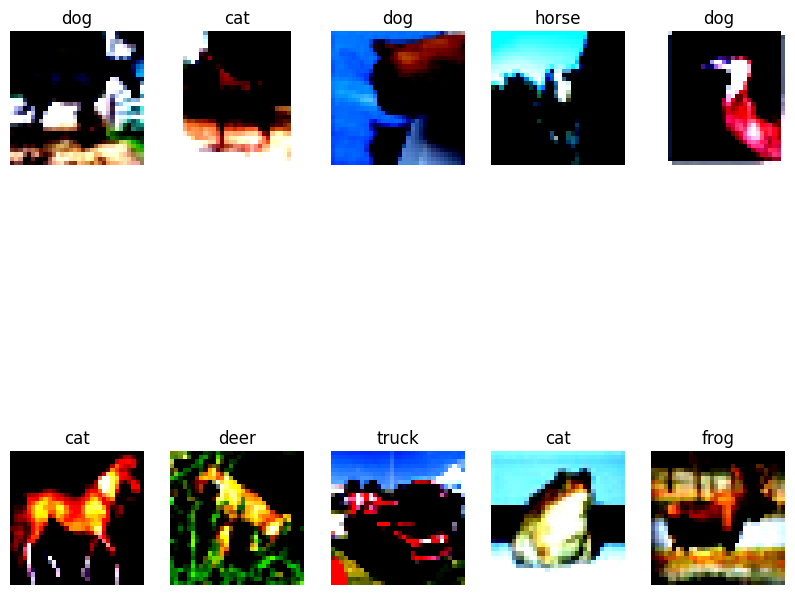

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

----****----Correctly predicted test images: 20


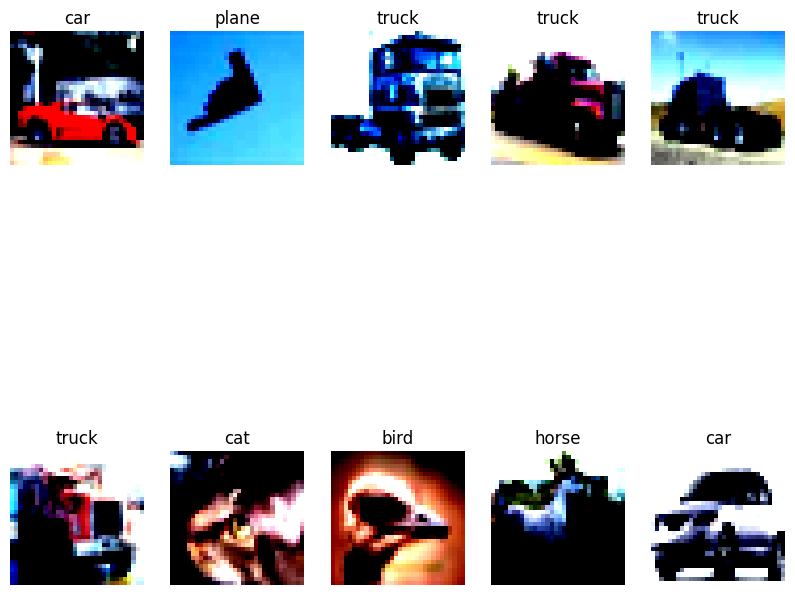

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

----****----Wrongly predicted train images: 20


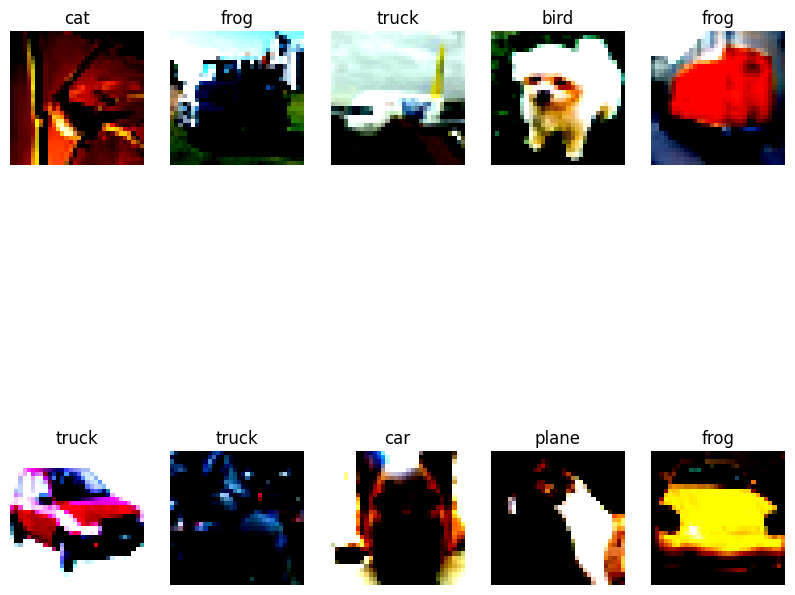

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


----****----Correctly predicted train images: 20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


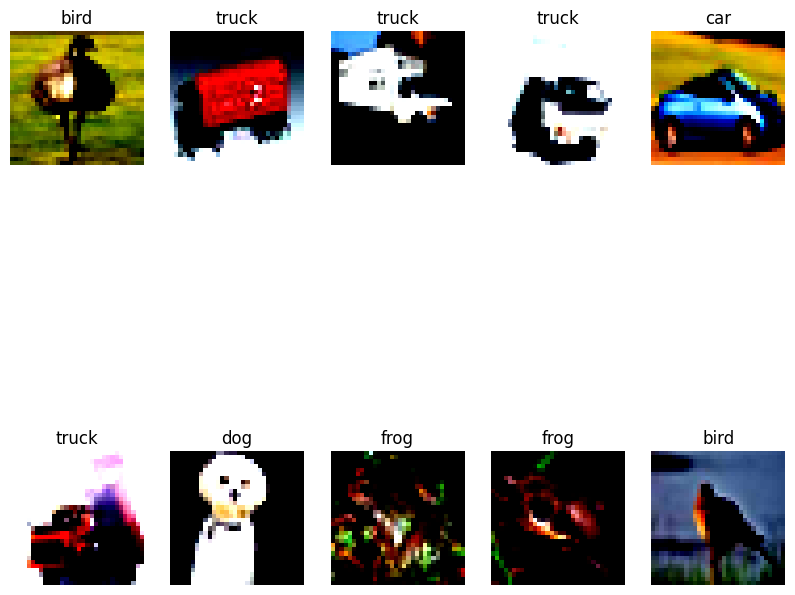

In [12]:

print(f"----****----Wrongly predicted test images: {len(wrongly_predicted_test_images)}")
imageVisualizationHelper.show_images_from_tensor_array(wrongly_predicted_test_images, image_classes, rows=2, cols=5)

print(f"----****----Correctly predicted test images: {len(correctly_predicted_test_images)}")
imageVisualizationHelper.show_images_from_tensor_array(correctly_predicted_test_images, image_classes, rows=2, cols=5)


print(f"----****----Wrongly predicted train images: {len(wrongly_predicted_trained_images)}")
imageVisualizationHelper.show_images_from_tensor_array(wrongly_predicted_trained_images, image_classes, rows=2, cols=5)

print(f"----****----Correctly predicted train images: {len(correctly_predicted_trained_images)}")
imageVisualizationHelper.show_images_from_tensor_array(correctly_predicted_trained_images, image_classes, rows=2, cols=5)
